<a href="https://colab.research.google.com/github/Pragadesh-45/kude/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

#import Tensorflow and TF datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

#helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
dataset

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('test'): <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [4]:
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir=PosixGPath('/tmp/tmppmcv4amjtfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao an

In [5]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [6]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankleboot']

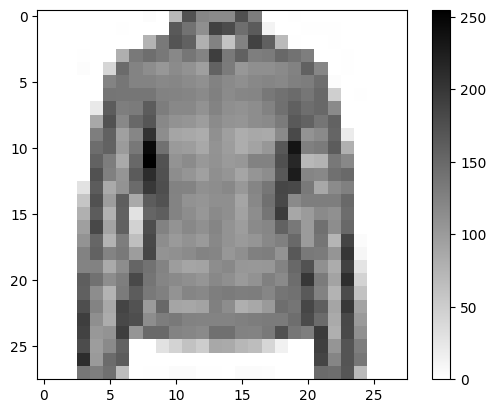

In [8]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break

image = image.numpy().reshape((28, 28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

## Model building

In [9]:
l1 = tf.keras.layers.Flatten(input_shape=(28,28,1))
l2 = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)
l3 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
model = tf.keras.Sequential([l1, l2, l3])

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [12]:
# total_epoch = epoch*steps_per_epoch
model.fit(train_dataset, epochs=20, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/20
1875/1875 [==============================] - 16s 3ms/step - loss: 3.0958 - accuracy: 0.6811
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7342 - accuracy: 0.7376
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6370 - accuracy: 0.7746
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5693 - accuracy: 0.8056
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5350 - accuracy: 0.8187
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5189 - accuracy: 0.8253
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4964 - accuracy: 0.8317
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4880 - accuracy: 0.8332
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4921 - accuracy: 0.8346
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.48

In [13]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.5469 - accuracy: 0.8140
Accuracy on test dataset: 0.8140000104904175


In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

1/1 [==============================] - 0s 70ms/step


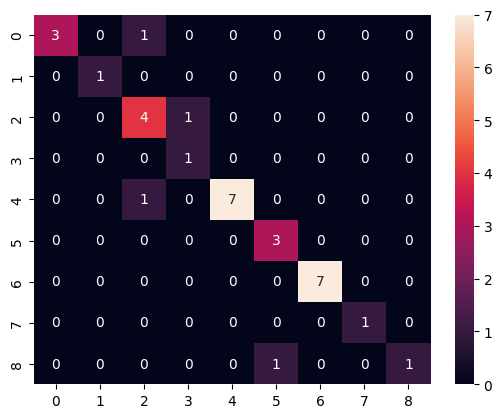

In [15]:
for d, y in test_dataset.take(1):
  y_pred = np.argmax(model.predict(d), axis=1)
  # print(y_pred)
  cf_matrix = confusion_matrix(y, y_pred)
  # print(cf_matrix)
  sns.heatmap(cf_matrix, annot=True)

In [16]:
# takes one batch of images
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 19ms/step


In [17]:
print(predictions.shape)
print(predictions[0])

(32, 10)
[1.3665385e-04 1.9319454e-04 9.3137190e-02 8.8002154e-04 8.9134961e-01
 2.5829525e-26 1.4303279e-02 0.0000000e+00 2.5826745e-09 0.0000000e+00]


In [18]:
np.argmax(predictions[0])

4

In [19]:
class_names[np.argmax(predictions[0])]

'Coat'